# A Detailed Guide to 5 Loss Functions for Machine Learning Algorithms with Python Code
> "This post covers multiple loss functions, where they work, and how you can code them in Python"
- toc: false
- branch: master
- badges: true
- comments: true
- image: images/lf.png
- hide: false
- search_exclude: false

In supervised machine learning algorithms, we want to minimize the error for each training example during the learning process. This is done using some optimization strategies like gradient descent. And this error comes from the loss function. Similat to a loss function, we also use a cost function. However, although cost function and loss function are synonymous and used interchangeably, they are different. A loss function is for a single training example. It is also sometimes called an error function. A cost function, on the other hand, is the average loss over the entire training dataset. The optimization strategies aim at minimizing the cost function.

<br>

## Regression Loss Functions

You must be quite familiar with linear regression at this point. It deals with modeling a linear relationship between a dependent variable, Y, and several independent variables, X_i’s. Thus, we essentially fit a line in space on these variables $Y = a0 + a1 * X1 + a2 * X2 + ....+ an * Xn$. We will use the given data points to find the coefficients a0, a1, …, an.

We will use the famous Boston Housing Dataset for understanding this concept. And to keep things simple, we will use only one feature – the Average number of rooms per dwelling (X) – to predict the dependent variable – Median Value (Y) of houses in USD 1000′ s. We will use Gradient Descent as an optimization strategy to find the regression line. Just as a refresher, the gradient descent update is as follows:
$$
\text{Repeat until convergence}\left\{ \theta_j \gets \theta_j - \alpha \frac{\partial }{\partial \theta_j}J(\theta) \right\}
$$

Here, $\theta_j$ is the weight to be updated, alpha is the learning rate and J is the cost function. The cost function is parameterized by theta. Our aim is to find the value of theta which yields minimum overall cost

For each loss function we will follow the following steps:
1. Write the expression for our predictor function, f(X) and identify the parameters that we need to find
2. Identify the loss to use for each training example
3. Find the expression for the Cost Function – the average loss on all examples
4. Find the gradient of the Cost Function with respect to each unknown parameter
5. Decide on the learning rate and run the weight update rule for a fixed number of iterations

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('housing.csv')
X = df['RM'].values
y = df['MEDV'].values

<br>

#### 1. Squared Error Loss

Squared Error loss for each training example, also known as L2 Loss, is the square of the difference between the actual and the predicted values: $ L = (y-f(x))^2$. The corresponding cost function is the Mean of these Squared Errors (MSE).  It is a positive quadratic function (of the form ax^2 + bx + c where a > 0). A quadratic function only has a global minimum. Since there are no local minima, we will never get stuck in one. Hence, it is always guaranteed that Gradient Descent will converge.

In [19]:
def squared_loss_update(m, b, X, y, learning_rate):
    # intitialize at zero
    m_deriv = 0
    b_deriv = 0
    N = len(X)
    
    for i in range(N):
        # calculate partial derivatives for loss function (y-mx-b)^2
        # -2x(y-mx-b)
        m_deriv = -2*X[i] * (y[i]-(m*X[i])-b)
        
        # -2(y-mx-b)
        b_deriv = -2 * (y[i] - m*X[i]-b)
        
        m -= (m_deriv/float(N)) * learning_rate
        b -= (b_deriv/float(N)) * learning_rate
        
    return m, b

In [20]:
MSE = []
m = 0.001
b = 0
N = len(X)
lr = 0.0001
for _ in range(0, 500):
    loss = 0
    for i in range(0, N):
        loss += (y[i] - m*X[i] - b)**2
    loss /= float(N)
    MSE.append(loss)
    m, b = squared_loss_update(m, b, X, y, lr)

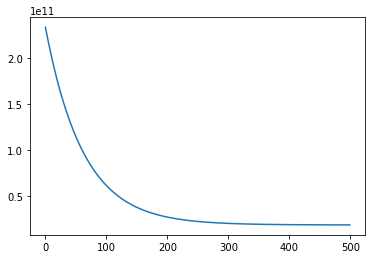

In [21]:
index = range(500)
plt.plot(index, MSE, label = 'alpha = 0.0001')

<br>

#### 2. Mean Absolute Error Loss

Absolute Error for each training example is the distance between the predicted and the actual values, irrespective of the sign. Absolute Error is also known as the L1 loss: $L = \left| y-f(x) \right|$. The cost is the Mean of these Absolute Errors (MAE), and it is more robust to outliers than MSE. Lets code the weights update for MAE. Recall, for the purposes of calculating the partial derivatives that $\frac{\partial }{\partial x_j}(x\to \left\| x_1 \right\|) = \frac{x_j}{\left| x_j \right|}$.

In [38]:
def MAE_loss_update(m, b, X, y, learning_rate):
    m_deriv = 0
    b_deriv = 0
    N = len(X)
    
    for i in range(N):
        # calculate partial derivatives
        # -x(y-mx-b) / |mx +b|
        m_deriv += (-X[i] * (y[i] - m*X[i] -b)) / (abs(y[i] - m*X[i]-b))
        
        # -(y-mx-b) / |mx +b|
        b_deriv += -(y[i] - m*X[i] -b) / (abs(y[i] - m*X[i]-b))
    
    m -= (m_deriv / float(N)) * learning_rate
    b -= (b_deriv / float(N)) * learning_rate

    return m, b   

In [41]:
MAE = []
m = 0.0001
b = 0
lr = 0.01
for _ in range(0, 500):
    loss = 0
    for i in range(0, N):
        loss += abs(y[i] -m*X[i] -b)
    loss /= float(N)
    MAE.append(loss)
    m, b = MAE_loss_update(m, b, X, y, lr)

<br>

#### 2. Mean Absolute Error Loss

The Huber loss combines the best properties of MSE and MAE. It is quadratic for smaller errors and is linear otherwise (and similarly for its gradient). It is identified by its delta parameter:
$$
L_\delta = \left\{\begin{matrix}
frac{1}{2}(y-f(x))^2,  & if \left | y-f(x) \right | \leq \delta\\ 
\delta\left | y-f(x) \right | -\frac{1}{2}\delta^2 & otherwise 
\end{matrix}\right.
$$

In [45]:
def Huber_update(m, b, X, Y, delta, learning_rate):
    m_deriv = 0
    b_deriv = 0
    N = len(X)
    for i in range(N):
        # derivative of quadratic for small values and of linear for large values
        if abs(Y[i] - m*X[i] - b) <= delta:
            m_deriv += -X[i] * (Y[i] - (m*X[i] + b))
            b_deriv += - (Y[i] - (m*X[i] + b))
        else:
            m_deriv += delta * X[i] * ((m*X[i] + b) - Y[i]) / abs((m*X[i] + b) - Y[i])
            b_deriv += delta * ((m*X[i] + b) - Y[i]) / abs((m*X[i] + b) - Y[i])
    
    # We subtract because the derivatives point in direction of steepest ascent
    m -= (m_deriv / float(N)) * learning_rate
    b -= (b_deriv / float(N)) * learning_rate

    return m, b

In [51]:
Huberloss = []
m = 0.001
b = 0
learning_rate = 0.0001
delta = 20
for iter in range(0, 500):
    loss = 0
    for i in range(0, N):
        if abs(y[i] - m*X[i] - b) <= delta:
            loss += ((y[i] - m * X[i] - b) ** 2) / 2
        else:
            loss += delta * abs(y[i] - m * X[i] - b) - (delta ** 2) / N
        
    loss /= float(N)
    Huberloss.append(loss)
    m, b = Huber_update(m, b, X, y, delta, learning_rate)

## Binary Classification Loss Functions

Binary Classification refers to assigning an object into one of two classes. This classification is based on a rule applied to the input feature vector. For example, classifying an email as spam or not spam based on, say its subject line, is binary classification. Lets illustrate these binary classification loss functions on the Breast Cancer dataset. A greater value of entropy for a probability distribution indicates a greater uncertainty in the distribution. Likewise, a smaller value indicates a more certain distribution. This makes binary cross-entropy suitable as a loss function – you want to minimize its value. We use binary cross-entropy loss for classification models which output a probability p. Then, the cross-entropy loss for output label y (can take values 0 and 1) and predicted probability p is defined as:
$$
L = -y*log(p) - (1-y)*log(1-p) = \left\{\begin{matrix}
-log(1-p) & y=0\\ 
-log(p) &  y=1
\end{matrix}\right.
$$

This is also called Log-Loss. To calculate the probability p, we can use the sigmoid function. Here, z is a function of our input features: $S(z) = \frac{1}{1+e^{-z}}$

In [60]:
import math
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler

cancer_dataset = load_breast_cancer()
data1 = pd.DataFrame(cancer_dataset.data, columns=cancer_dataset.feature_names)
data1['Class'] = cancer_dataset.target
X1 = data1['worst area'].values.reshape(-1, 1)
X2 = data1['mean symmetry'].values.reshape(-1, 1)
Y = data1['Class'].values
N1 = len(X1)

scaler = MinMaxScaler()
X1 = scaler.fit_transform(X1)
X2 = scaler.fit_transform(X2)

#### 1. Binary Cross Entropy Loss

In [62]:
def BCE_update(m1, m2, x1, x2, y, learning_rate):
    m1_deriv = 0
    m2_deriv = 0
    b_deriv = 0
    
    N = len(X1)
    for i in range(0, N):
        m1_deriv += -X1[i] * (s - Y[i])
        m2_deriv += -X2[i] * (s - Y[i])
        b_deriv += -(s - Y[i])
    
    m1 -= (m1_deriv/float(n)) * learning_rate
    m2 -= (m2_deriv/float(n)) * learning_rate
    b -= (b_deriv/float(n)) * learning_rate
    
    return m1, m2, b

In [ ]:
BCE = []
m1 = 0
m2 = 0
b = 0
lr = 0.0001
for _ in range(500):
    loss = 0
    for i in range(0, N1):
        p = 1/(1 + math.exp(-m1*X1[i] - m2*X2[i] - b))
        if Y[i] == 0:
            loss += -math.log(1-p)
        else:
            loss += -math.log(p)
    loss /= float(N1)
    BCE.append(loss)
    m1, m2, b = BCE_update(m1, m2, b, X1, X2, Y, lr)

#### 2. Hinge Loss

Hinge loss is primarily used with Support Vector Machine (SVM) Classifiers with class labels -1 and 1. So make sure you change the label of the ‘Malignant’ class in the dataset from 0 to -1. Hinge Loss not only penalizes the wrong predictions but also the right predictions that are not confident. Hinge loss for an input-output pair (x, y) is given as:
$$
L = max(0, 1-y*f(x))
$$

In [63]:
def Hinge_update(m1, m2, b, X1, X2, y, learning_rate):
    m1_deriv = 0
    m2_deriv = 0
    b_deriv = 0
    N = len(X1)
    
    for i in range(0, N):
        if Y[i]*(m1*X1[i] + m2*X2[i] + b) <= 1:
            m1_deriv += -X1[i] * Y[i]
            m2_deriv += -X2[i] * Y[i]
            b_deriv += -Y[i]
    
    m1 -= (m1_deriv / float(N)) * learning_rate
    m2 -= (m2_deriv / float(N)) * learning_rate
    b -= (b_deriv / float(N)) * learning_rate

    return m1, m2, b

In [ ]:
Hinge = []
m1 = 0
m2 = 0
b = 0
learning_rate = 0.001
for _ in range(0, 1000):
    loss = 0
    for i in range(0, N1):
        if Y[i]*(m1*X1[i] + m2*X[i] + b) <= 1:
            loss += 1 - Y[i]*(m1*X1[i] + m2*X[i] + b)
    loss /= float(N1)
    Hinge.append(loss)
    m1, m2, b = Hinge_update(m1, m2, b, X1, X2, y, learning_rate)